In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from matplotlib import colors

import dmp_var_cue_corr as dmpcc


## Example plot with 100% group correlation of "correlated cue"

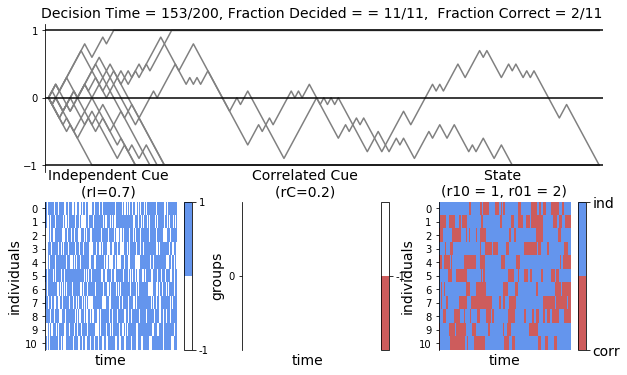

In [2]:
N =11
T = 20
dt = 0.1
rC = 0.2
rI = 0.7
rate = (2,1)
cue_updates=1000
cue_correlation=1

params = dmpcc.init_params(N=N, T=T, dt=dt, rI=rI, rC=rC, rate01=rate[0], rate10=rate[1], cue_updates=cue_updates, cue_correlation=cue_correlation)
decision, positions, corr_vals, ind_vals, states, decision_time = dmpcc.RandomWalkDMP(params, return_everything=True)
dmpcc.make_plot(decision, positions, corr_vals, ind_vals, states, decision_time, params)

## Example plot with 50% group correlation of "correlated cue"

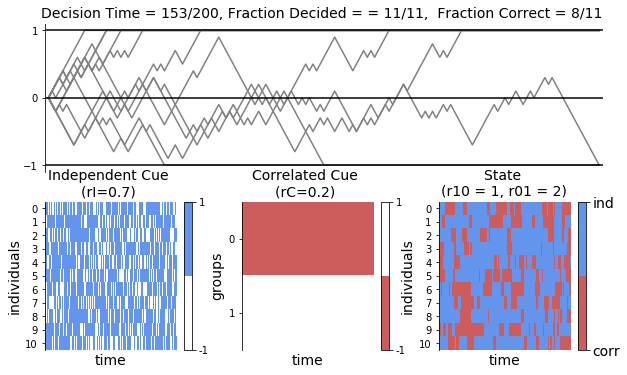

In [3]:
N =11
T = 20
dt = 0.1
rC = 0.2
rI = 0.7
rate = (2,1)
cue_updates=1000
cue_correlation=0.5

params = dmpcc.init_params(N=N, T=T, dt=dt, rI=rI, rC=rC, rate01=rate[0], rate10=rate[1], cue_updates=cue_updates, cue_correlation=cue_correlation)
decision, positions, corr_vals, ind_vals, states, decision_time = dmpcc.RandomWalkDMP(params, return_everything=True)
dmpcc.make_plot(decision, positions, corr_vals, ind_vals, states, decision_time, params)

## Example plot with 0 % group correlation of "correlated cue"

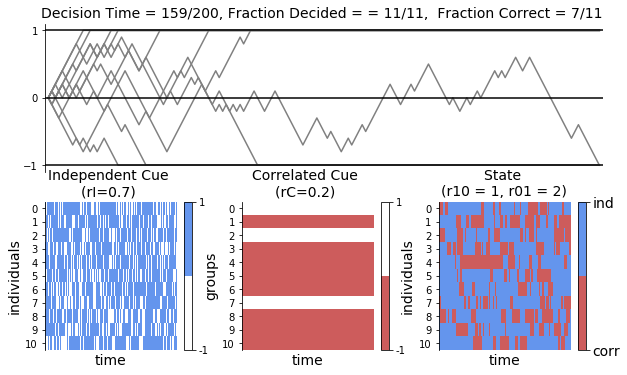

In [4]:
N =11
T = 20
dt = 0.1
rC = 0.2
rI = 0.7
rate = (2,1)
cue_updates=1000
cue_correlation=0.

params = dmpcc.init_params(N=N, T=T, dt=dt, rI=rI, rC=rC, rate01=rate[0], rate10=rate[1], cue_updates=cue_updates, cue_correlation=cue_correlation)
decision, positions, corr_vals, ind_vals, states, decision_time = dmpcc.RandomWalkDMP(params, return_everything=True)
dmpcc.make_plot(decision, positions, corr_vals, ind_vals, states, decision_time, params)

## Scan Accuracy across group and time correlation of "correlated cue"

In [5]:
ITERS=10
N =51
T = 30
dt = 0.1
rC = 0.2
rI = 0.7
rate = (2,1)
cue_updates=list(np.arange(0, int(T/dt),20))
cue_updates[0] = 1
cue_updates.append(10000)
cue_correlations=np.arange(0, 1.1,0.1)

res_acc = np.zeros((len(cue_updates), len(cue_correlations)))
res_dec= np.zeros((len(cue_updates), len(cue_correlations)))
res_n = np.zeros((len(cue_updates), len(cue_correlations)))


for cu_idx, cue_update in enumerate(cue_updates): 
    for cc_idx, cue_correlation in enumerate(cue_correlations): 
        ACC = []
        DEC = []
        NN = 0
        for i in range(ITERS):
            clear_output(wait=True)
            print(cue_update,cue_correlation, i )
            params = dmpcc.init_params(N=N, T=T, dt=dt, rI=rI, rC=rC, rate01=rate[0], rate10=rate[1], cue_updates=cue_update, cue_correlation=cue_correlation)
            decision, _, _, _, _, decision_time = dmpcc.RandomWalkDMP(params, return_everything=True)
            if len(decision)==N: 
                NN +=1
                ACC.append(int(sum(decision)>0))
                DEC.append(decision_time)
                
        res_acc[cu_idx, cc_idx]= np.mean(ACC)
        res_dec[cu_idx, cc_idx]= np.mean(DEC)
        res_n[cu_idx, cc_idx]= NN

10000 1.0 9


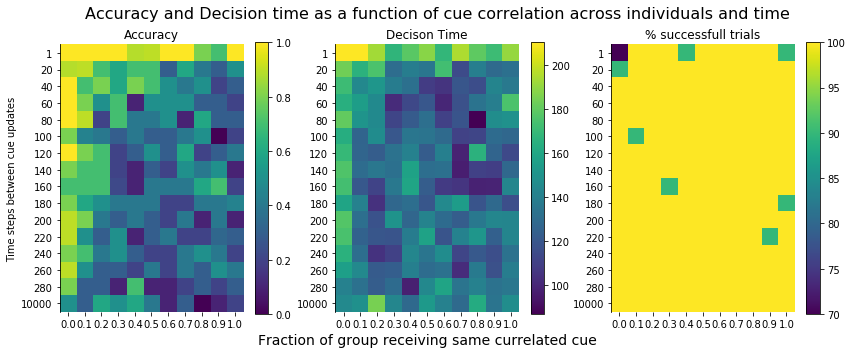

In [7]:
plt.figure(figsize=(14,5))
plt.suptitle("Accuracy and Decision time as a function of cue correlation across individuals and time", size=16)

plt.subplot(1,3,1)#
plt.imshow(res_acc)
plt.colorbar()
plt.title("Accuracy")
plt.xticks(np.arange(0, len(cue_correlations)), np.round(cue_correlations, 2))
plt.yticks(np.arange(len(cue_updates)), cue_updates)
plt.ylabel("Time steps between cue updates")

plt.subplot(1,3,2)#
plt.imshow(res_dec)
plt.colorbar()
plt.title("Decison Time")
plt.xticks(np.arange(0, len(cue_correlations)), np.round(cue_correlations, 2))
plt.xlabel("Fraction of group receiving same currelated cue", size=14)
plt.yticks(np.arange(len(cue_updates)), cue_updates)



plt.subplot(1,3,3)#
plt.imshow(100*res_n/ITERS)
plt.colorbar()
plt.title("% successfull trials")
plt.xticks(np.arange(0, len(cue_correlations)), np.round(cue_correlations, 2))
plt.yticks(np.arange(len(cue_updates)), cue_updates)


plt.show()